In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter, OrderedDict

style.use('ggplot')

In [2]:
df = pd.read_csv('../data/checkins.csv')

In [3]:
df.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824,5222,38.895112,-77.036366,2012-04-21 17:43:47
1,984234,44652,5222,33.800745,-84.410520,2012-04-21 17:43:43
2,984291,105054,5222,45.523452,-122.676207,2012-04-21 17:39:22
3,984318,2146539,5222,40.764462,-111.904565,2012-04-21 17:35:46
4,984232,93870,380645,33.448377,-112.074037,2012-04-21 17:38:18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396634 entries, 0 to 396633
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          396634 non-null  int64  
 1   user_id     396634 non-null  int64  
 2   venue_id    396634 non-null  int64  
 3   latitude    396634 non-null  float64
 4   longitude   396634 non-null  float64
 5   created_at  396634 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 18.2+ MB


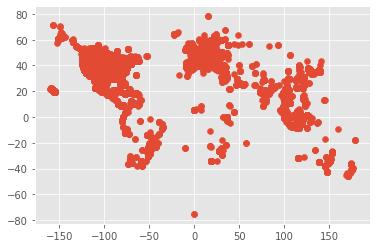

In [5]:
plt.scatter(df.longitude, df.latitude)
plt.show()

In [6]:
df_short = df.loc[:, ['latitude', 'longitude']]
df_short = df_short.sample(n=100000)

In [7]:
df_short.head()

,latitude,longitude
212172,32.981212,-117.078863
118823,33.993068,-117.968676
214884,33.448377,-112.074037
167666,45.523452,-122.676207
202797,40.650000,-73.950000


In [8]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 212172 to 45411
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   100000 non-null  float64
 1   longitude  100000 non-null  float64
dtypes: float64(2)
memory usage: 2.3 MB


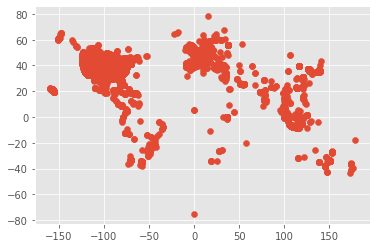

In [9]:
plt.scatter(df_short.longitude, df_short.latitude)
plt.show()

In [10]:
ms = MeanShift(bandwidth=0.1)
ms.fit(df_short)

MeanShift(bandwidth=0.1)

In [13]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# ms.predict(df_short)

print(n_clusters_)

3591


In [21]:
cnts = Counter(labels)

In [22]:
cnts

Counter({16: 948,
         65: 112,
         3: 2731,
         30: 531,
         0: 14280,
         118: 62,
         707: 12,
         81: 155,
         84: 151,
         4: 2721,
         15: 767,
         17: 689,
         14: 1061,
         27: 632,
         9: 1303,
         20: 822,
         1: 3892,
         29: 628,
         5: 3759,
         188: 45,
         1672: 3,
         2136: 2,
         615: 11,
         230: 29,
         206: 59,
         143: 90,
         72: 186,
         176: 78,
         6: 1839,
         18: 791,
         23: 634,
         70: 183,
         28: 648,
         11: 1141,
         59: 259,
         102: 133,
         306: 42,
         37: 399,
         368: 33,
         131: 101,
         61: 193,
         92: 150,
         1042: 6,
         21: 693,
         271: 45,
         849: 8,
         1027: 6,
         58: 261,
         1258: 4,
         41: 380,
         49: 271,
         86: 172,
         811: 9,
         7: 1621,
         47: 305,
       

In [23]:
centers_15 = []
for val, key in zip(cnts.values(), cnts.keys()):
    if val > 15:
        centers_15.append(key)

In [24]:
centers_15

[16,
 65,
 3,
 30,
 0,
 118,
 81,
 84,
 4,
 15,
 17,
 14,
 27,
 9,
 20,
 1,
 29,
 5,
 188,
 230,
 206,
 143,
 72,
 176,
 6,
 18,
 23,
 70,
 28,
 11,
 59,
 102,
 306,
 37,
 368,
 131,
 61,
 92,
 21,
 271,
 58,
 41,
 49,
 86,
 7,
 47,
 8,
 43,
 113,
 2,
 62,
 13,
 19,
 418,
 204,
 558,
 128,
 108,
 12,
 286,
 294,
 73,
 353,
 509,
 44,
 222,
 75,
 71,
 156,
 377,
 194,
 25,
 94,
 50,
 171,
 91,
 375,
 24,
 107,
 219,
 22,
 334,
 36,
 364,
 32,
 117,
 419,
 67,
 305,
 236,
 55,
 68,
 119,
 210,
 120,
 466,
 54,
 437,
 56,
 130,
 110,
 291,
 173,
 95,
 46,
 40,
 181,
 93,
 64,
 560,
 51,
 39,
 608,
 53,
 584,
 356,
 330,
 199,
 343,
 423,
 547,
 332,
 335,
 31,
 124,
 42,
 97,
 33,
 339,
 296,
 52,
 594,
 378,
 76,
 151,
 256,
 263,
 285,
 169,
 430,
 180,
 357,
 123,
 424,
 208,
 105,
 221,
 226,
 183,
 410,
 532,
 284,
 254,
 101,
 10,
 125,
 216,
 104,
 79,
 63,
 99,
 129,
 355,
 255,
 344,
 85,
 26,
 186,
 242,
 472,
 311,
 446,
 315,
 155,
 133,
 295,
 154,
 370,
 121,
 241,
 443,
 14

In [25]:
cluster_centers_15 = []

for i in range(n_clusters_):
    if i in centers_15:
        cluster_centers_15.append(cluster_centers[i])

In [28]:
len(cluster_centers_15)

601

In [29]:
len(centers_15)

601

In [30]:
def distanceCalculator(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [31]:
carnival_offices = pd.DataFrame({
    'city':['Los-Angeles', 'Miami', 'London', 'Amsterdam', 'Beijing', 'Sydney'], 
    'latitude':[33.751277, 25.867736, 51.503016, 52.378894, 39.366487, -33.868457],
    'longitude':[-118.188740, -80.324116, -0.075479, 4.885084, 117.036146, 151.205134]
    })

In [32]:
carnival_offices

,city,latitude,longitude
0,Los-Angeles,33.751277,-118.188740
1,Miami,25.867736,-80.324116
2,London,51.503016,-0.075479
3,Amsterdam,52.378894,4.885084
4,Beijing,39.366487,117.036146
5,Sydney,-33.868457,151.205134


In [49]:
dist = {}

for i in range(len(cluster_centers_15)):
    for j in range(carnival_offices.shape[0]):
        d = distanceCalculator(x1 = cluster_centers_15[i][1], y1 = cluster_centers_15[i][0], x2 = carnival_offices.longitude[j], y2 = carnival_offices.latitude[j])
        dist[d] = cluster_centers_15[i]

In [56]:
od = OrderedDict(sorted(dist.items()))
od

OrderedDict([(0.0016263401013527287, array([-33.86950465, 151.20637795])),
             (0.009221757630717777, array([52.3730556,  4.8922222])),
             (0.025019651243878154, array([ 25.84551352, -80.31262059])),
             (0.05319722787852315, array([51.50236584, -0.12867225])),
             (0.07562079911305845, array([  33.8114574 , -118.14294891])),
             (0.11965459012754792, array([ 25.89867841, -80.20853145])),
             (0.13531535725542604, array([ 25.78692141, -80.21558376])),
             (0.18573226078570382, array([ 26.00534948, -80.19938027])),
             (0.19181981215564256, array([  33.89305632, -118.05953681])),
             (0.2015717571915384, array([  33.95279599, -118.19335186])),
             (0.21924115301755215, array([  33.87328086, -118.37089856])),
             (0.2729954296317537, array([ 26.13993769, -80.34491851])),
             (0.30293657505080807, array([  33.81030467, -117.89160989])),
             (0.30505582733226255, array([ 26